## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
# Atualmente, este é meu bloco básico fixo de importações
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests as rq
%matplotlib inline

# Este é meu bloco de importações para uso de Árvores de Decisão/Regressão
from sklearn import tree
from sklearn import datasets
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ["MEDV"])

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [4]:
# Trecho de criacao das arvores
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 2360873)
df_d8 = DecisionTreeRegressor(random_state = 0, max_depth = 8)

# Trecho de treinamento da arvore
df_t_d8 = df_d8.fit(X_treino, y_treino)

# Calculo do MSE da arvore em treino
mse_t_d8 = mean_squared_error(y_treino, df_t_d8.predict(X_treino))
template1 = "O MSE da árvore treinamento_8 é: {1:.2f}"
print(template1.format(df_t_d8.get_depth(), mse_t_d8).replace(".",","))

# Calculo do ajuste da arvore em treino
rq_t_8 = df_t_d8.score(X_treino, y_treino)
template2 = "O R² da árvore treinamento_8 é: {1:.2f}"
print(template2.format(df_t_d8.get_depth(), rq_t_8).replace(".",","))

# Sessao de testes das arvores treinadas
df_teste_d8 = df_d8.fit(X_teste, y_teste)

# Calculo do MSE da arvore em teste
mse_teste_d8 = mean_squared_error(y_teste, df_teste_d8.predict(X_teste))
template3 = "O MSE da árvore teste_8 é: {1:.2f}"
print(template3.format(df_teste_d8.get_depth(), mse_teste_d8).replace(".",","))

# Calculo do R² da arvore em teste
rq_teste_8 = df_teste_d8.score(X_teste, y_teste)
template4 = "O R² da árvore teste_8 é: {1:.2f}"
print(template4.format(df_teste_d8.get_depth(), rq_teste_8).replace(".",","))

O MSE da árvore treinamento_8 é: 1,48
O R² da árvore treinamento_8 é: 0,98
O MSE da árvore teste_8 é: 0,76
O R² da árvore teste_8 é: 0,99


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [5]:
# Calculando os valores do caminho
caminho = df_d8.cost_complexity_pruning_path(X_treino, y_treino)
caminho

{'ccp_alphas': array([0.00000000e+00, 7.53295669e-05, 1.27118644e-04, 1.27118644e-04,
        1.27118644e-04, 2.25988701e-04, 2.25988701e-04, 3.53107345e-04,
        5.08474576e-04, 9.03954802e-04, 9.03954802e-04, 9.22787194e-04,
        1.41242938e-03, 1.41242938e-03, 1.70903955e-03, 1.88323917e-03,
        2.07627119e-03, 2.72128060e-03, 2.76836158e-03, 2.94256121e-03,
        3.17796610e-03, 3.95951036e-03, 4.00423729e-03, 4.35263653e-03,
        4.77401130e-03, 6.79849341e-03, 7.64830508e-03, 7.96986817e-03,
        9.50282486e-03, 9.96233522e-03, 1.08474576e-02, 1.15348399e-02,
        1.49320689e-02, 1.52966102e-02, 1.53813559e-02, 1.73022599e-02,
        1.93731840e-02, 1.95322168e-02, 2.03954802e-02, 2.17175141e-02,
        2.33109699e-02, 2.47179065e-02, 2.82780132e-02, 2.91479769e-02,
        2.96610169e-02, 3.00322841e-02, 4.29379204e-02, 4.43177412e-02,
        4.73008475e-02, 4.81379473e-02, 4.98305085e-02, 5.19067797e-02,
        5.19926119e-02, 5.20710250e-02, 5.29713360

Text(0, 0.5, 'Impureza total das folhas')

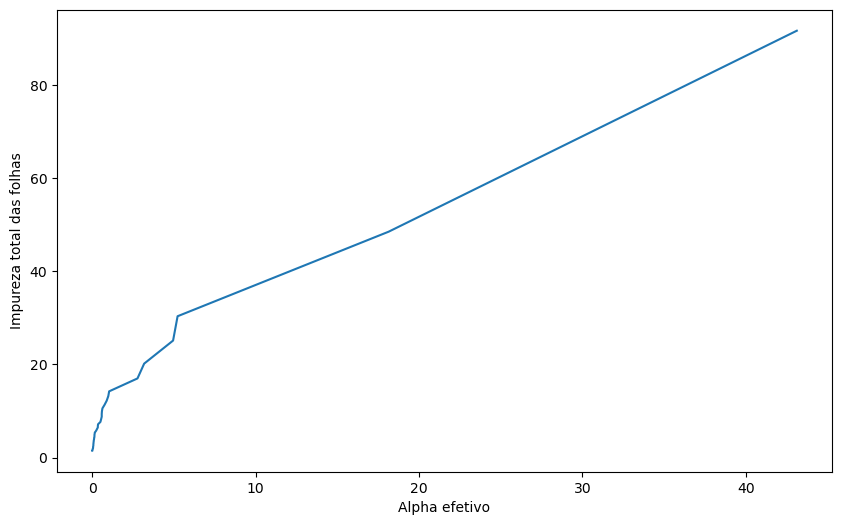

In [6]:
# Separando os valores dos eixos para exibição
ccp_alphas, impurezas = caminho.ccp_alphas, caminho.impurities

# Grafico de exibicao ajustado
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurezas)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [7]:
# Lista vazia
lista_arvores = []

# Treinando cada arvore percorrendo todas
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state = 0, ccp_alpha = ccp_alpha)
    clf.fit(X_treino, y_treino)
    lista_arvores.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

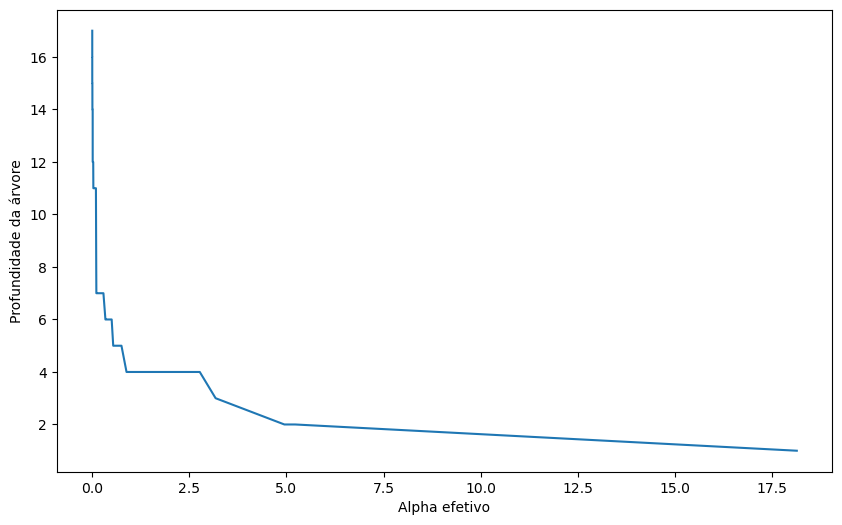

In [8]:
# Conferindo visualmente a relacao de Alpha com a profundidade da lista
profundidades = [clf.tree_.max_depth for clf in lista_arvores]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], profundidades[:-1])
plt.xlabel("Alpha efetivo")
plt.ylabel("Profundidade da árvore")

A Profundidade 8 tem alpha efetivo muito baixo.

A profundidade 2 tem alpha efetivo igual a 5.

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [9]:
# Calculando o MSE para todas as arvores listadas, treino ou teste
treino_scores = [mean_squared_error(y_treino, clf.predict(X_treino)) for clf in lista_arvores]
teste_scores  = [mean_squared_error(y_teste, clf.predict(X_teste)) for clf in lista_arvores]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

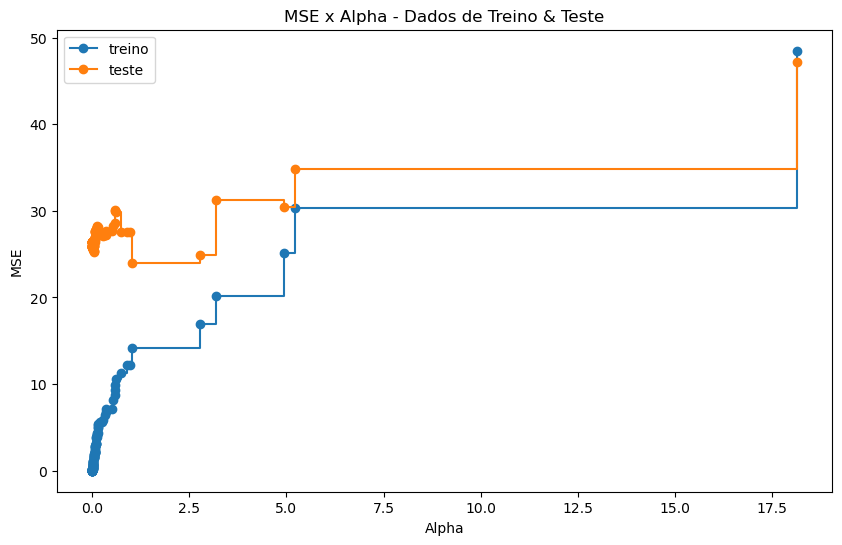

In [10]:
# Construindo e ajustando o grafico
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_xlabel("Alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x Alpha - Dados de Treino & Teste")

ax.plot(ccp_alphas[:-1], treino_scores[:-1], marker = "o", label = "treino", drawstyle = "steps-post")
ax.plot(ccp_alphas[:-1], teste_scores[:-1], marker = "o", label = "teste", drawstyle = "steps-post")

ax.legend()
plt.show()

O valor é próximo de alpha igual a 5; confirmando a observação do exercício 3.

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [11]:
# Calculando o R² com profundidade 2 e corte igual a 5
df_d2_p5 = DecisionTreeRegressor(random_state = 0, max_depth = 2, ccp_alpha = 5)
df_d2_p5.fit(X_treino, y_treino)

print(f"O valor R² da árvore é: {df_d2_p5.score(X_teste, y_teste):.2f}")

O valor R² da árvore é: 0.55


### 7. Visualize esta árvore.

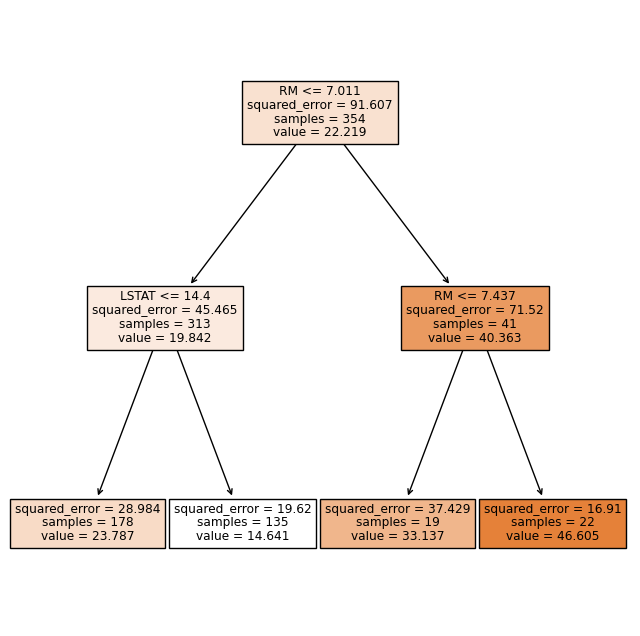

In [12]:
plt.rc("figure", figsize=(8, 8))
tp = tree.plot_tree(df_d2_p5, feature_names = X.columns, filled = True)